<a href="https://colab.research.google.com/github/andypedre2016/Data-MIning-Class/blob/main/Image_cls_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification 

I am going to be using the CIFAR-10 dataset for this project. I will be predicting the images into the 10 possible castegories described in the instructions. For that I am going to use a Convolutional Neural Network.

In [139]:
#Importing the data set
import tensorflow as tf
import keras
from tensorflow.keras import datasets

#Importing dataset and dividing in images and labels as a format
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


Then the model will be train from the "train_images" and "train_labels", and will be tested using the "test_images" and the "test_labels".

In [140]:
#Taking a look at the shape of the train images
train_images.shape

(50000, 32, 32, 3)

Looks like we have 50000 images 32x32 pixels and RGB.

In [141]:
#taking a look at the shape of the labels
print('train labels:' , train_labels.shape)
print('train images:' , train_images.shape)
print('test labels:' , test_labels.shape)
print('test images:', test_images.shape)

train labels: (50000, 1)
train images: (50000, 32, 32, 3)
test labels: (10000, 1)
test images: (10000, 32, 32, 3)


In [142]:
#Displaying 5 of the training labels
train_labels[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

We can see that the labels are in a fromart of a two dimensional array. I want to reshape it into a one dimensional array.

In [143]:
#Using resahpe method to flatten a numpy array
train_labels = train_labels.reshape(-1, )
train_labels[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [144]:
#Reshaping the test images
test_labels = test_labels.reshape(-1, )
test_labels[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [145]:
#Creating an array of the name of the labels column
#This would be the possible classification of each image
columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [158]:
#To get an idea of how this data looks like:
#I am going to make a function that display images

#Importing pyplot
import matplotlib.pyplot as plt

#function that takes as a parameter the index of an image
def displayImage(images, labels, index):
    plt.figure(figsize= (2, 2))
    plt.imshow(images[index])
    plt.xlabel(columns[labels[index]])

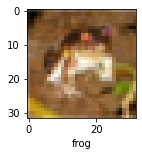

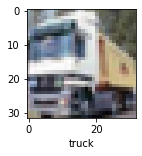

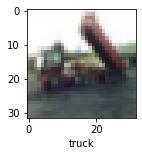

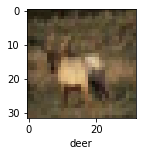

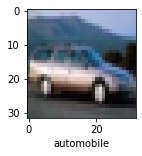

In [159]:
#Calling the function created to display a few of the images
displayImage(train_images, train_labels, 0)
displayImage(train_images, train_labels, 1)
displayImage(train_images, train_labels, 2)
displayImage(train_images, train_labels, 3)
displayImage(train_images, train_labels, 4)

So each image is displayed with its corresponding index from the columns array.

##Predicting with a CNN model

In [148]:
#Diving the images by 255 to normalize it
train_images = train_images / 255
test_images = test_images / 255

In [149]:
#Building the CNN model
from keras import layers
from keras import models

#Instantiating the model
model = models.Sequential()

#Adding the CNN layers

#Activation layer
#Adding a Conv2D layer, 3x3 patches and a depth of 32. The input with be 32 x 32 pixels and depth 3.
model.add(layers.Conv2D(filters= 32, kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3)))
#Adding a MaxPooling2D with a patch size of 2 x 2.
model.add(layers.MaxPooling2D((2, 2)))
#Adding another Conv2D layer 3x3 patches and a depth of 64 activtion relu.
model.add(layers.Conv2D(filters= 64, kernel_size= (3, 3), activation='relu'))
#Adding another MaxPooling2D with a patch size of 2 x 2.
model.add(layers.MaxPooling2D((2, 2)))

#Adding Dense layers

#Flattenig
model.add(layers.Flatten())
#Adding a dense layer of 64 
model.add(layers.Dense(64, activation='relu'))
#Adding a classification layer activation softmax
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 2304)              0         
                                                                 
 dense_14 (Dense)            (None, 64)              

In [150]:
#Compiling the model
#loss is set to sparse_categorical_crossentropy because I am not using one hot encoded labels
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [151]:
#Training the model using training images and labels
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4826 - accuracy: 0.4656
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1211 - accuracy: 0.6064
Epoch 3/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.9996 - accuracy: 0.6521
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9164 - accuracy: 0.6825
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8521 - accuracy: 0.7028
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7970 - accuracy: 0.7243
Epoch 7/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.7509 - accuracy: 0.7398
Epoch 8/10
1563/1563 [==============================] - 76s 48ms/step - loss: 0.7114 - accuracy: 0.7536
Epoch 9/10
1563/1563 [==============================] - 73s 46ms/step - loss: 0.6736 - accuracy: 0.7648
Epoch 10/10
1563/1563 [==============================] - 72s 46m

In [152]:
#Evaluating the model to see how accurated it is
model.evaluate(test_images, test_labels)

313/313 [==============================] - 5s 14ms/step - loss: 0.9580 - accuracy: 0.6828


[0.9579833745956421, 0.6827999949455261]

This model has an accuracy of aroud 68%

---



Now let's view some of the data the model just predicted:

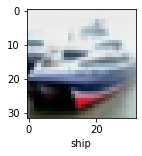

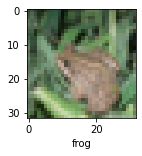

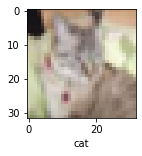

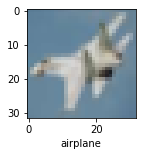

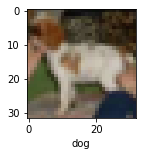

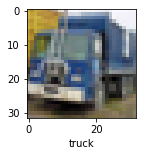

In [161]:
#Using the functing created before 
displayImage(test_images, test_labels, 1)
displayImage(test_images, test_labels, 4)
displayImage(test_images, test_labels, 8)
displayImage(test_images, test_labels, 10)
displayImage(test_images, test_labels, 12)
displayImage(test_images, test_labels, 14)